## How to do some GIS using Geopandas: 
#### An introduction for novices, by a novice. 
***Purpose:*** To showcase a clean Jupyter notebook that outputs webmap-ready data (GeoJSON).  This notebook will incorporate Geopandas, and a variety of other Python libraries to import, wrangle, analyze, and export data within a typical data-viz and mapping workflow.

###### Created by Ritchie Katko (rakatk0@uky.edu) for [UKy Geography's New Maps Plus](http://newmapsplus.uky.edu/) MAP674 Fall 2019

##### Objective: 
This notebook will fulfill its purpose through the exploration of New York City Police Department's ["Stop, Question, Frisk" Data](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page) for the year 2016.  This data originates as a CSV, projected in [EPSG:2263 NAD83 / New York Long Island (ftUS)](https://epsg.io/2263). It will have to be cleaned up and reprojected to be ready for analysis against other geospatial data (see below).

Please note the following: The data wrangling and analysis performed in this notebook is intended to function as a geopandas tutorial, rather than as a piece of data-journalism. 

Data utilized in this notebook: 
- [NYPD Precinct Boundaries](https://data.cityofnewyork.us/Public-Safety/Police-Precincts/78dh-3ptz)
- ["Stop, Question, Frisk" Data](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page)



#### Setting up the environment
Here's my background specs: 
- ***OS***: Ubuntu 16.04.6 LTS
- ***Python version***: `$ /usr/bin/python3 -V` 3.5.2
- ***Anaconda3 version***: `$ conda info` 4.5.11

###### Conda Environment 
The following packages must be installed (`$ conda install`) into the active Conda environment:
- `Jupyter` (allows use of jupyter coding environment
- `Geopandas` (integrates other packages geospatial components) 
- `Matplotlib` (dataviz package - allows plotting of visualizations)

##### after activating the Conda Environment of choice, navigate to the working directory and run `jupyter notebook` to initiate the browser-based notebook environment.  

##### Now, let's get to work: 

##### First we'll Add packages to allow for their use in this environment
From the [pandas website](https://pandas.pydata.org/): "pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language"

From the [numpy website](https://numpy.org/): "Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases."

In [1]:
# import packages, using aliases to simplify code
import pandas as pd
import numpy as np

##### Load Local Data
We'll load a CSV into the notebook as dataframe `df`. This CSV is hosted locally within the repository. Using the `.type()` method, the cell will output the type of data.  In this case it is a `pandas.core.frame.DataFrame`

In [2]:
# load csv into notebook as dataframe 'df', and check the data  
path_to_file = './data/sqf-2016.csv'
# url version: path_to_file = 'https://www1.nyc.gov/assets/nypd/downloads/excel/analysis_and_planning/stop-question-frisk/sqf-2016.csv'

df = pd.read_csv(path_to_file,  dtype = str) # load csv data as pandas DataFrame, load # dtype = str, 
type(df)

pandas.core.frame.DataFrame

##### take a look at the data, from a few angles
Using `.shape` provides a simple look at the number of rows and columns.  using `.sample(X)` provides a random sampling of X # of rows for inspection.   `.head()` and `.tail()` return the first 5, and last 5 rows, respectively. Using `list(df.columns)` will return a list of all the columns within the dataframe. 

In [3]:
df.shape, df.sample(2)  # shape will return the number of rows, and columns.  .sample() will return a random row

((12405, 112),
       year  pct ser_num datestop timestop recstat inout trhsloc perobs  \
 3920  2016   23      72  3292016     1420       1     O       P   5.00   
 7623  2016  122     128  6222016     2323       1     O       P   1.00   
 
      crimsusp  ... zip addrpct sector beat post   xcoord   ycoord dettypCM  \
 3920      CPW  ...          23      G            1001995   229037       CM   
 7623   FELONY  ...         122      I             961742   156964       CM   
 
      lineCM detailCM  
 3920      1       20  
 7623      1       85  
 
 [2 rows x 112 columns])

In [4]:
df.head(), df.tail()

(   year pct ser_num datestop timestop recstat inout trhsloc perobs  \
 0  2016  41      22  2072016      100       A     O       P   1.00   
 1  2016  10      22  2182016       30       1     O       P   8.00   
 2  2016  66       1  1012016       30       1     I       P   2.00   
 3  2016  47      18  1012016       40       1     O       H   1.00   
 4  2016  79       1  1012016       50       1     O       P   3.00   
 
       crimsusp  ... zip addrpct sector beat post   xcoord   ycoord dettypCM  \
 0         BURG  ...          41      B    2       1013353   234000       CM   
 1  MISDEMEANOR  ...          10      D             983478   212373       CM   
 2          FEL  ...          66      F             988340   172111       CM   
 3          FEL  ...          47      C                                   CM   
 4       D.W.I.  ...          79      G    4        998197   187413       CM   
 
   lineCM detailCM  
 0      1       14  
 1      1       28  
 2      1        9  
 3    

In [5]:
# drop the last row, which is blank
df.drop(df.tail(1).index,inplace=True)

In [6]:
list(df.columns) # take a look at all the columns

['year',
 'pct',
 'ser_num',
 'datestop',
 'timestop',
 'recstat',
 'inout',
 'trhsloc',
 'perobs',
 'crimsusp',
 'perstop',
 'typeofid',
 'explnstp',
 'othpers',
 'arstmade',
 'arstoffn',
 'sumissue',
 'sumoffen',
 'compyear',
 'comppct',
 'offunif',
 'officrid',
 'frisked',
 'searched',
 'contrabn',
 'adtlrept',
 'pistol',
 'riflshot',
 'asltweap',
 'knifcuti',
 'machgun',
 'othrweap',
 'pf_hands',
 'pf_wall',
 'pf_grnd',
 'pf_drwep',
 'pf_ptwep',
 'pf_baton',
 'pf_hcuff',
 'pf_pepsp',
 'pf_other',
 'radio',
 'ac_rept',
 'ac_inves',
 'rf_vcrim',
 'rf_othsw',
 'ac_proxm',
 'rf_attir',
 'cs_objcs',
 'cs_descr',
 'cs_casng',
 'cs_lkout',
 'rf_vcact',
 'cs_cloth',
 'cs_drgtr',
 'ac_evasv',
 'ac_assoc',
 'cs_furtv',
 'rf_rfcmp',
 'ac_cgdir',
 'rf_verbl',
 'cs_vcrim',
 'cs_bulge',
 'cs_other',
 'ac_incid',
 'ac_time',
 'rf_knowl',
 'ac_stsnd',
 'ac_other',
 'sb_hdobj',
 'sb_outln',
 'sb_admis',
 'sb_other',
 'repcmd',
 'revcmd',
 'rf_furt',
 'rf_bulg',
 'offverb',
 'offshld',
 'forceuse',


##### are there any columns we don't care about that can be removed?   
This dataset has granular detail on 12000+ incidents.  Let's simplify this. Taking a look at a key provided for this data, there are many detailed records for each individual stop.  The dataset provides information on if an arrest or summons was made, if a weapon was found, if force was used, demographic info about the person stopped, and location information about when and where the stop occured, as well as information regarding the officer who made the stop. Quite a few columnns, for the purpose of this investigation, can be removed.  To do so, one can use the `.drop() method`.  

In [7]:
df = df.drop(columns=['year',
 'ser_num',
 'recstat',
 'inout',
 'trhsloc',
 'perobs',
 'perstop',
 'typeofid',
 'explnstp',
 'othpers',
 'compyear',
 'comppct',
 'offunif',
 'officrid',
 'adtlrept',
 'riflshot',
 'asltweap',
 'machgun',
 'othrweap',
 'radio',
 'ac_rept',
 'ac_inves',
 'rf_vcrim',
 'rf_othsw',
 'ac_proxm',
 'rf_attir',
 'cs_objcs',
 'cs_descr',
 'cs_casng',
 'cs_lkout',
 'rf_vcact',
 'cs_cloth',
 'cs_drgtr',
 'ac_evasv',
 'ac_assoc',
 'cs_furtv',
 'rf_rfcmp',
 'ac_cgdir',
 'rf_verbl',
 'cs_vcrim',
 'cs_bulge',
 'cs_other',
 'ac_incid',
 'ac_time',
 'rf_knowl',
 'ac_stsnd',
 'ac_other',
 'sb_hdobj',
 'sb_outln',
 'sb_admis',
 'sb_other',
 'repcmd',
 'revcmd',
 'rf_furt',
 'rf_bulg',
 'offverb',
 'offshld',
 'forceuse',
 'dob',
 'ht_feet',
 'ht_inch',
 'weight',
 'haircolr',
 'eyecolor',
 'build',
 'othfeatr',
 'addrtyp',
 'rescode',
 'premtype',
 'premname',
 'addrnum',
 'stname',
 'stinter',
 'crossst',
 'aptnum',
 'state',
 'zip',
 'addrpct',
 'sector',
 'beat',
 'post',
 'dettypCM',
 'lineCM',
 'detailCM'])

In [8]:
# return a list of remaining columns 
list(df.columns)

['pct',
 'datestop',
 'timestop',
 'crimsusp',
 'arstmade',
 'arstoffn',
 'sumissue',
 'sumoffen',
 'frisked',
 'searched',
 'contrabn',
 'pistol',
 'knifcuti',
 'pf_hands',
 'pf_wall',
 'pf_grnd',
 'pf_drwep',
 'pf_ptwep',
 'pf_baton',
 'pf_hcuff',
 'pf_pepsp',
 'pf_other',
 'sex',
 'race',
 'age',
 'city',
 'xcoord',
 'ycoord']

##### after taking a look at the data and identifying some coordinates, further inspect the geometry columns.

These are labeled `xcoord` and `ycoord`.  Let's figure out what type of data this is using `type()` along with bracket notation to drill into specific cells within columns. 


In [9]:
# check datatype of 'xcoord' & 'ycoord'
type(df.xcoord[1]), type(df.ycoord[1]) # str

(str, str)

##### since these are strings, removing extra spaces at the beginning or end of the string that may be lingering is necessary before converting over to a numerical type
This is done with using the `.map()` method (which allows for changes to an entire series), with the `.str.strip()`.  This was completed for a variety of columns that utilized strings.  

In [10]:
#remove extra spaces in strings
df["xcoord"] = df["xcoord"].map(str.strip)  
df["ycoord"] = df["ycoord"].map(str.strip)
df["timestop"] = df["timestop"].map(str.strip)
df["pct"] = df["pct"].map(str.strip)

In [11]:
# lets look at the first 5 rows of data in this column
df.xcoord.head(), df.ycoord.head()  # and we see the 4th row has no coordinate in either

(0    1013353
 1     983478
 2     988340
 3           
 4     998197
 Name: xcoord, dtype: object, 0    234000
 1    212373
 2    172111
 3          
 4    187413
 Name: ycoord, dtype: object)

##### Finding an empty row  in the first 5 of 12405 rows is _sheer luck_. If the first 5 rows were geocoded, that error would not have been observed. How could we search for these? 

Since these are `str`, they won't have any `'NaN'` values.  Rather than visually parse this for bad data, lets assume that any cells without coordinates have some other value within them (or are empty strings, especially since we stripped zeros).  If we sort for the most frequent value in this column, it might return a default string value when there is no location information.

In [12]:
# check to see what the most common value
# .idxmax() returns the most common value in a column
df.xcoord.value_counts().idxmax(), df.ycoord.value_counts().idxmax()  # answer will an empty string value ('')

('', '')

##### after identifying the cell value that indicates ***not geocoded***,  now remove ungeocoded cells from the dataframe
This will occur in 2 phases.  In the first,  replace all empty strings `''`, with `'NaN'`, and then check the datashape for comparison after phase 2.  In phase 2, we will drop all rows with `'NaN'` values in the columns specified, and then check the shape to verify that rows were dropped. 

In [13]:
# replace empty strings with NaN
df['xcoord'].replace('', np.nan, inplace=True)
df['ycoord'].replace('', np.nan, inplace=True)

df.shape # check number of rows here for comparison with result of next step

(12404, 28)

In [14]:
# Now drop the null values
df.dropna(subset=['xcoord'], inplace=True)
df.dropna(subset=['ycoord'], inplace=True)
df.shape # check number of rows here for comparison with result of previous step to verify removal

(12053, 28)

#### # to be useful later, we need numerical values (for now, integers), not Strings. 
Converting the coordinates into numerical values is paramount. 

In [15]:
df.head()

,pct,datestop,timestop,crimsusp,arstmade,arstoffn,sumissue,sumoffen,frisked,searched,...,pf_baton,pf_hcuff,pf_pepsp,pf_other,sex,race,age,city,xcoord,ycoord
0,41,2072016,100,BURG,N,,Y,TRESPAS,Y,Y,...,N,Y,N,N,M,B,48,BRONX,1013353,234000
1,10,2182016,30,MISDEMEANOR,N,,N,,N,Y,...,N,N,N,N,M,W,20,MANHATTAN,983478,212373
2,66,1012016,30,FEL,Y,ASSAULT,N,,Y,Y,...,N,N,N,N,M,P,34,BROOKLYN,988340,172111
4,79,1012016,50,D.W.I.,N,,N,,N,N,...,N,N,N,N,M,B,22,BROOKLYN,998197,187413
5,73,1012016,100,FELONY,N,,N,,Y,N,...,N,N,N,N,M,B,30,BROOKLYN,1008226,186458


In [16]:
# convert strings to integers
df.xcoord = pd.to_numeric(df.xcoord, errors='ignore')
df.ycoord = pd.to_numeric(df.ycoord, errors='ignore')
df.xcoord[1]

983478

##### After deleting some rows, resetting the index is important.  
But before that happens, reordering chronologically might be useful.  First, convert strings to integers, then sort in chronological order, then reset the index.  

In [17]:
df.datestop = df['datestop'].apply(int)
df.sort_values(by=['datestop'],inplace = True) # sort dataframe by 'date', will sort smallest to largest value, so january 1 will be first! 

In [18]:
# reset index
df = df.reset_index()

# delete prior index
del df['index'] 
print(df.datestop.head()), print(df.datestop.tail())  #note these first 5 values are all on jan 1 2016, verifying it worked! 

0    1012016
1    1012016
2    1012016
3    1012016
4    1012016
Name: datestop, dtype: int64
12048    12312016
12049    12312016
12050    12312016
12051    12312016
12052    12312016
Name: datestop, dtype: int64


(None, None)

#### Lets drill into the dataset a bit with some queries.

##### which precinct had the most number of stop and frisks in 2016?  Let's figure that out and end up with a dataframe for merging with our Precincts GeoJson

In [19]:
# extract series from df 
counts = df['pct'].value_counts()
counts.head()

106    1217
49      553
114     373
40      370
23      365
Name: pct, dtype: int64

In [20]:
# convert series to pandas dataframe & reset index
counts = pd.DataFrame(counts).reset_index()
type(counts), counts.shape, counts.columns, counts.head()

(pandas.core.frame.DataFrame,
 (77, 2),
 Index(['index', 'pct'], dtype='object'),
   index   pct
 0   106  1217
 1    49   553
 2   114   373
 3    40   370
 4    23   365)

In [21]:
# rename columns 
counts.rename(columns={'index': 'precinct', 'pct': 'counts'}, inplace=True)
counts.head(), type(counts)

(  precinct  counts
 0      106    1217
 1       49     553
 2      114     373
 3       40     370
 4       23     365, pandas.core.frame.DataFrame)

###### we'll park this here and come back when we import the NYPD Precincts geojson 

##### now, find all instances with 'use of force'

In [22]:
### find total number of instances of use of force used
a = df.loc[(df['pf_pepsp'] == 'Y') | (df['pf_hands'] == 'Y') | (df['pf_wall'] == 'Y') | (df['pf_grnd'] == 'Y') | (df['pf_drwep'] == 'Y') | (df['pf_ptwep'] == 'Y') | (df['pf_baton'] == 'Y') | (df['pf_hcuff'] == 'Y') | (df['pf_other'] == 'Y')]
count = str(a.shape[0])
print('There were ' + count + ' uses of force during SQF in 2016.')

There were 3773 uses of force during SQF in 2016.


#### find all instances of minors in the Bronx caught with pistols

In [23]:
df['pistol'].unique() # verify that values are present
a = df.loc[df['pistol'].isin(['Y']) & (df['city'] == 'BRONX') & (df['age'] < '18')] # query for various conditions
print(a)

      pct  datestop timestop crimsusp arstmade        arstoffn sumissue  \
3284   40   3152016     1628   FELONY        Y  PL 265.03 (01)        N   
6847   40   6122016        0      CPW        Y             CPW        N   
7409   45   6302016     1520     MISD        Y             CPW        N   
9172   48   9012016     1815      CPW        Y             CPW        N   
9182   48   9012016     1815      CPW        Y             CPW        N   
9966   40  10032016     1820      CPW        N                        N   
11485  46  11292016     1834      CPW        Y             CPW        N   

      sumoffen frisked searched  ... pf_baton pf_hcuff pf_pepsp pf_other sex  \
3284                 Y        Y  ...        N        Y        N        N   M   
6847                 Y        N  ...        N        Y        N        N   M   
7409                 N        Y  ...        N        Y        N        N   M   
9172                 Y        Y  ...        N        N        N        Y   M   

In [24]:
# stash the data locally as json
with open('./data/2016stops.json', 'w') as f:
    f.write(df.to_json())

##### now verify the file was written 

In [25]:
# imports the OS module, using the .walk() method returns information about the current working directory. 
import os
for root, dirs, files in os.walk('./data/'):
    for filename in files:
        print(filename)

sqf-2016.csv
2016stops.json
nypd-precincts.geojson


#### so, we've got a JSON.  To continue, we'll need to define geometry for this using Shapely, prior to converting into a GeoDataFrame for all our awesome web-mapping applications downstream.  

##### Importing geopandas and shapely modules will allow convert coordinates into points with a projection.  

In [26]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, mapping

##### access JSON that we created and stashed locally and load as dataframe

In [27]:
path_to_file = './data/2016stops.json'
df = pd.read_json(path_to_file) # load csv data as pandas DataFrame
type(df), df.head()

(pandas.core.frame.DataFrame,
    pct  datestop  timestop     crimsusp arstmade           arstoffn sumissue  \
 0  115   1012016      2012     BURGLARY        Y  CRIMINAL TRESPASS        N   
 1   81   1012016      1525       FELONY        N                           N   
 2   81   1012016      1535       FELONY        N                           N   
 3   14   1012016      1645          FEL        N                           N   
 4   90   1012016      1700  MISDEMEANOR        N                           N   
 
   sumoffen frisked searched  ... pf_baton pf_hcuff pf_pepsp pf_other sex race  \
 0                Y        Y  ...        N        Y        N        N   M    Q   
 1                Y        Y  ...        N        N        N        N   M    B   
 2                Y        Y  ...        N        N        N        N   M    B   
 3                Y        N  ...        N        N        N        N   M    W   
 4                N        N  ...        N        N        N        N   

##### create the geometry...
this requires us to know the projection that the `xcoord` and `ycoord` were presented.  after a bit of digging, I was able to determine that NYPD used ESPG:2263 as the projected coordinate system.  

In [28]:
# create geometry using Shapely Point & assign proper projection
geometry = [Point(xy) for xy in zip(df.xcoord, df.ycoord)]
df = df.drop(['xcoord', 'ycoord'], axis=1)
crs = {'init': 'epsg:2263'}
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
gdf.head()

,pct,datestop,timestop,crimsusp,arstmade,arstoffn,sumissue,sumoffen,frisked,searched,...,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other,sex,race,age,city,geometry
0,115,1012016,2012,BURGLARY,Y,CRIMINAL TRESPASS,N,,Y,Y,...,N,N,Y,N,N,M,Q,29,QUEENS,POINT (1021102 213296)
1,81,1012016,1525,FELONY,N,,N,,Y,Y,...,N,N,N,N,N,M,B,21,BROOKLYN,POINT (1006272 189184)
2,81,1012016,1535,FELONY,N,,N,,Y,Y,...,N,N,N,N,N,M,B,22,BROOKLYN,POINT (1006272 189184)
3,14,1012016,1645,FEL,N,,N,,Y,N,...,N,N,N,N,N,M,W,20,MANHATTAN,POINT (987866 214721)
4,90,1012016,1700,MISDEMEANOR,N,,N,,N,N,...,N,N,N,N,N,M,W,25,BROOKLYN,POINT (1002739 196254)


##### reproject data to web-map ready EPSG:4326

In [29]:
gdf.to_crs(epsg=4326, inplace=True)
#gdf.to_crs({'init': 'epsg:4269'})
gdf.crs

{'init': 'epsg:4326', 'no_defs': True}

##### visualize the data (are we mapping yet?), but first we'll need to import some plotting tools. 

In [30]:
# import plotter 
%matplotlib inline

import matplotlib.pyplot as plt
# change default figsize
plt.rcParams['figure.figsize'] = (30, 24)

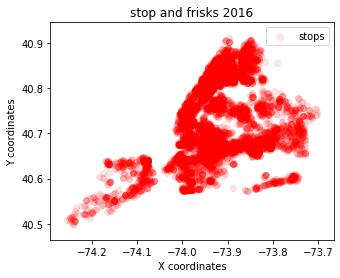

In [31]:
fig, ax = plt.subplots()
 
base_color = '#f0f0f0'
border_color = base_color
 
gdf.plot(ax=ax, color='red', alpha=0.1, zorder=0, label='stops');  #low opacity adds a heatmap effect at this scale.  unintentional
 
ax.set(title="stop and frisks 2016",
       xlabel="X coordinates",
       ylabel="Y coordinates") 
ax.legend();

#### its alive!  bring in some other data to see if everything appears to be in order

In [32]:
# import datasets
pr = gpd.read_file('./data/nypd-precincts.geojson') # import precincts geometry

##### first double-check the CRS on the data

In [33]:
# check CRS
pr.crs

{'init': 'epsg:4326'}

[(40.25, 41), (-74.3, -73.6)]

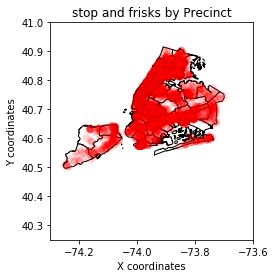

In [39]:
# let's visualize these new layers
fig, ax = plt.subplots()
 
base_color = 'white'
border_color = base_color

# layers to print
gdf.plot(ax=ax, color='red', alpha=0.04, zorder=3, label='stops');  #low opacity adds a heatmap effect at this scale.  unintentional
pr.plot(ax=ax, edgecolor='black', color='white', alpha=1, legend = True, zorder=2);

# add title and labels
ax.set(title="stop and frisks by Precinct",
       xlabel="X coordinates",
       ylabel="Y coordinates") 

# reset bounds to match NYC data
ax.set(xlim=(-74.3,-73.6), ylim=(40.25,41))

##### let's merge the precinct "counts" into the precincts geojson

In [40]:
# check the columns
pr.columns

Index(['precinct', 'shape_area', 'shape_leng', 'geometry', 'counts'], dtype='object')

In [41]:
# first check data types to make sure they match up
type(counts.precinct[0]), type(pr.precinct[0])

(str, str)

In [42]:
# convert integer to string
pr.precinct = pr.precinct.astype(str)

# first check data types to make sure they match up
type(counts.precinct[0]), type(pr.precinct[0])

(str, str)

In [43]:
# Merge with `merge` method on shared variable (precinct):
pr = pr.merge(counts, on='precinct')
print(pr)

   precinct     shape_area     shape_leng  \
0         1  47313318.0761  80563.0640816   
1         5  18088797.9526  18676.1242594   
2         6  22098189.8026  26402.9006691   
3        71  45331787.1744  29978.0942611   
4        72  104621257.743  87968.1945199   
..      ...            ...            ...   
72      115  113293878.523  58272.2043476   
73      120  232535326.782  96171.7239832   
74      121  475716087.709  138115.721207   
75      122  454799251.518   154881.00631   
76      123  460870016.224  120830.181066   

                                             geometry  counts_x  counts_y  
0   (POLYGON ((-74.0438776157395 40.69018767637665...        58        58  
1   (POLYGON ((-73.98863862848766 40.7229337202636...        93        93  
2   (POLYGON ((-73.99968392160721 40.7385522486597...        31        31  
3   (POLYGON ((-73.92854313809303 40.6645732858473...       191       191  
4   (POLYGON ((-73.99840899113158 40.6718687230323...       123       123  
.. 

##### Now we can visualize the Precincts geojson, as a chloropeth, with the counts of Stop and Frisk Incidents per precinct as the ramp value. 
this uses matplotlib's colormap parameter `cmap`

KeyError: 'counts'

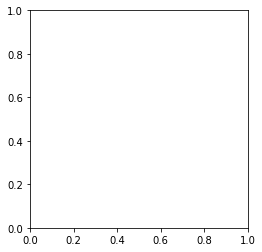

In [44]:
fig, ax = plt.subplots()
 
base_color = 'white'
border_color = base_color

# layers to print
pr.plot(ax=ax, edgecolor='black', column='counts', cmap = 'RdPu', alpha=1, legend = True, zorder=2);
gdf.plot(ax=ax, markersize=1, alpha=1, color='black', zorder=3);  #low opacity adds a heatmap effect at this scale.

# add title and labels
ax.set(title="stop and frisks by Precinct",
       xlabel="X coordinates",
       ylabel="Y coordinates") 

# reset bounds to match NYC data
ax.set(xlim=(-74.3,-73.6), ylim=(40.25,41))

quickly take a look at `pr` Precincts

In [45]:
#stacking these data inspection commands is possible using commas
pr.sort_values(by=['precinct'],inplace = True),pr.head(),type(pr.precinct[0]),pr.precinct[0]

(None,    precinct     shape_area     shape_leng  \
 0         1  47313318.0761  80563.0640816   
 8        10  27267320.8712  40281.5273576   
 57      100  205185208.374  283995.945115   
 58      101  84672696.7164  78292.5824223   
 59      102  133314470.842  52865.2810669   
 
                                              geometry  counts_x  counts_y  
 0   (POLYGON ((-74.0438776157395 40.69018767637665...        58        58  
 8   (POLYGON ((-74.00138603698601 40.7628500950018...        79        79  
 57  (POLYGON ((-73.83668274106707 40.5949466970158...        81        81  
 58  (POLYGON ((-73.76669139771178 40.6142546554500...       103       103  
 59  (POLYGON ((-73.81709738756589 40.7040298010850...       102       102  , str, '1')

In [46]:
type(pr.precinct[0])

str

#### Let's look at the busiest precinct.  If you remember from earlier, that was 106. 

In [47]:
# clip the precinct 106
pr106 = pr.loc[pr['precinct'] == '106']

In [48]:
# check geometry
pr106.geom_type.unique()

array(['MultiPolygon'], dtype=object)

In [49]:
# check bounding box of precinct 106
pr106.bounds

,minx,miny,maxx,maxy
63,-73.863171,40.644134,-73.801179,40.691947


[(40.64, 40.69), (-73.86, -73.8)]

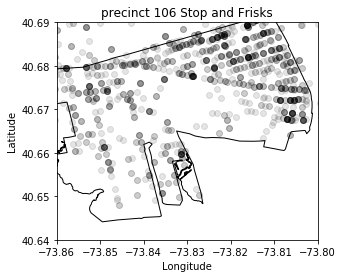

In [50]:
# Plot these using the following technique, creating subplots assigned to the fig and ax variables, 
# setting a couple default variables for the colors, 
# and plotting a background using the bounding box and the world countries from Natural Earth.
fig, ax = plt.subplots()
 
base_color = '#f0f0f0'
border_color = base_color
 
pr106.plot(ax=ax, color='white', edgecolor='black', zorder=0)
gdf.plot(ax=ax, color='black', alpha=0.1, zorder=6);


ax.set(title="precinct 106 Stop and Frisks",
       xlabel="Longitude",
       ylabel="Latitude")

# reset bounds to match precinct 106 bounds
ax.set(xlim=(-73.86,-73.8), ylim=(40.64,40.69))

##### export the stop/frisk data as webmap ready GEOJSON

In [51]:
#export as geojson 
### throws an error unless file is deleted prior
gdf.to_file(r'./data/2016stops.geojson', driver="GeoJSON")

In [52]:
#double check the data, for ASMR purposes alone
for root, dirs, files in os.walk('./data/'):
    for filename in files:
        print(filename)

2016stops.geojson
sqf-2016.csv
2016stops.json
nypd-precincts.geojson


#### Finally! export the notebook as an HTML file for easy webviewing

In [53]:
!jupyter nbconvert --to html rakatk0-python-pandas-geopandas-101.ipynb

[NbConvertApp] Converting notebook rakatk0-python-pandas-geopandas-101.ipynb to html
[NbConvertApp] Writing 458862 bytes to rakatk0-python-pandas-geopandas-101.html
